In [33]:
import spotipy
import pandas as pd
import json
import os
import random
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d as m3d

In [2]:
os.getcwd()

'/Users/ismaelcisse/IronHack_labs/DAFT_0410/module_2/Project_Week_6'

In [7]:
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv


#load_dotenv('.env')




In [8]:
import config

In [10]:
c_id = config.c_id
c_se = config.c_se

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))

In [21]:
#  1 time only
#Compteur = 0

# 1
en ajoutant offset=i pour i=0,50,10,...maxi;  on récupère par lot de 50 jusqu'a maxi
ca marche pas au dela de 1000


In [49]:
# init
#genre = 'Rock Noise'
#Track_ids = []
#Tracks = []

In [50]:
start = 0
maxi = 1000

print('Len Tracks Before :',len(Tracks))
for i in range(start,maxi,50):
    try:
        Results = sp.search(q='genre:"{}"'.format(genre), type='track',offset=i, limit=50)
        Tracks = Tracks + Results['tracks']['items']
    except spotipy.SpotifyException as e:
        print(e.msg)

Track_ids = Track_ids + [Track['id'] for Track in Tracks]
print('Len Tracks After  :',len(Tracks))

Len Tracks Before : 0
Len Tracks After  : 1000


# 2

In [51]:
#Get audio feature for each track
list_of_audio_features=[]
for item in range(0,len(Tracks)):
#for item in range(0,10):
    MyDic = {}
    MyDic= '{ "item" : ' + str(Compteur) + ',"name" : "' + Tracks[item]['name'].replace('"','')  +  '" ,"artist" : "' + Tracks[item]['artists'][0]['name'] + '"}'
    #print(MyDic)
    Compteur += 1
    MyDic = json.loads(MyDic)
    try:
        MyDic.update(sp.audio_features(Tracks[item]["id"])[0])
        print(MyDic)
        list_of_audio_features.append(MyDic)
    except spotipy.SpotifyException as e:
        print(e.msg)
print('\n\n\nDone',item, ' of ',Compteur)  

{'item': 4000, 'name': 'Pepper', 'artist': 'Butthole Surfers', 'danceability': 0.631, 'energy': 0.804, 'key': 7, 'loudness': -5.492, 'mode': 1, 'speechiness': 0.166, 'acousticness': 0.00589, 'instrumentalness': 0.00116, 'liveness': 0.16, 'valence': 0.671, 'tempo': 79.898, 'type': 'audio_features', 'id': '1ng36571Iyov4HBxUClySn', 'uri': 'spotify:track:1ng36571Iyov4HBxUClySn', 'track_href': 'https://api.spotify.com/v1/tracks/1ng36571Iyov4HBxUClySn', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1ng36571Iyov4HBxUClySn', 'duration_ms': 297267, 'time_signature': 4}
{'item': 4001, 'name': 'Waiting Room', 'artist': 'Fugazi', 'danceability': 0.618, 'energy': 0.716, 'key': 6, 'loudness': -8.224, 'mode': 0, 'speechiness': 0.0367, 'acousticness': 0.00473, 'instrumentalness': 0.822, 'liveness': 0.179, 'valence': 0.545, 'tempo': 92.174, 'type': 'audio_features', 'id': '2DBlfjL5chsdeULzhTp5K8', 'uri': 'spotify:track:2DBlfjL5chsdeULzhTp5K8', 'track_href': 'https://api.spotify.com/v1/trac

# 3

In [52]:

df=pd.DataFrame(list_of_audio_features)    
df=df[["item","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]


In [53]:
print(len(df))
display(df.head(5))

1000


,item,id,name,artist,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,4000,1ng36571Iyov4HBxUClySn,Pepper,Butthole Surfers,0.631,0.804,7,1,-5.492,0.1660,0.005890,0.00116,0.1600,0.671,79.898,297267
1,4001,2DBlfjL5chsdeULzhTp5K8,Waiting Room,Fugazi,0.618,0.716,6,0,-8.224,0.0367,0.004730,0.82200,0.1790,0.545,92.174,173267
2,4002,0lDoG5fQ9cmpvpenwR7Jln,Incinerate,Sonic Youth,0.446,0.866,8,1,-8.016,0.0342,0.079400,0.54300,0.1370,0.455,152.172,295813
3,4003,28c4nfBHdb3xviamRCEsIe,Feel the Pain,Dinosaur Jr.,0.340,0.804,0,1,-8.355,0.0516,0.003310,0.01910,0.0727,0.854,131.500,259600
4,4004,3HMOMdRPywfouYx5B4PvaH,Carry the Zero,Built To Spill,0.264,0.812,4,1,-5.651,0.0310,0.000013,0.10800,0.0962,0.458,94.095,343893


In [47]:
#pas utile
#df = df.drop_duplicates()

In [54]:
#append to csv
df.to_csv('audio_features.csv',mode='a',index=False, header=False)

In [18]:
#1srt create csv with columns name csv
#df.to_csv('audio_features.csv',mode='a',index=False)

In [11]:
genres = ['A Cappella','Acid House','Acid Jazz','Acid Techno','Acoustic Blues','Acoustic Pop','African Percussion','Afrobeat','Alternative Country','Albuquerque Indie','Alternative Americana','Alternative Country','Alternative Dance','Alternative Emo','Alternative Hardcore','Alternative Hip Hop','Alternative Metal','Alternative Metalcore','Alternative New Age','Alternative Pop','Alternative Pop Rock','Alternative R&b','Alternative Rock']
genres = genres + ['Baroque','Bebop','Black Metal','Blues','Blues-rock','Bossa Nova','Brazilian Gospel','Breakbeat','Britpop']
genres = genres + ['Cabaret','Cajun','Calypso','Candy Pop','Capoeira','Cello','Celtic','Celtic Rock','Chanson','Chill Groove','Chill Lounge','Choral','Christmas']
genres = genres + ['Classic Afrobeat','Classic Belgian Pop','Classic Chinese Pop','Classic Colombian Pop','Classic Czech Pop','Classic Danish Pop','Classic Dutch Pop','Classic Eurovision','Classic Finnish Pop','Classic Finnish Rock','Classic French Pop','Classic Funk Rock','Classic Garage Rock','Classic Italian Pop','Classic Norwegian Pop','Classic Peruvian Pop','Classic Polish Pop','Classic Psychedelic Rock','Classic Rock','Classic Russian Pop','Classic Russian Rock','Classic Schlager','Classic Soundtrack','Classic Swedish Pop','Classic Turkish Pop','Classic Venezuelan Pop','Classical','Classical Christmas','Classical Flute','Classical Guitar','Classical Organ','Classical Performance','Classical Period','Classical Piano']
genres = genres + ['Comedy','Concert Piano','Country Blues','Country Christmas','Country Dawn','Country Gospel','Country Road','Country Rock']
genres = genres + ['Dance Pop','Dance Rock','Dance-punk','Digital Hardcore','Dirty South Rap','Dirty Texas Rap','Disco','Dubstep']
genres = genres + ['Electric Blues','Electro','Electro Dub','Electro House','Electro Jazz','Electro Latino','Electro Swing','Electro Trash','Electro-industrial','Eurovision']
genres = genres + ['Experimental','Experimental Dubstep','Experimental Psych','Experimental Rock']
genres = genres + ['Flamenco','Folk','Folk Christmas','Folk Metal','Folk Punk','Folk Rock','Folk-pop','Folk-prog','Folklore Argentino','Folkmusik','Free Jazz','Freestyle','French Folk','French Folk Pop','French Hip Hop','French Indie Pop','French Movie Tunes','French Pop','French Punk','French Reggae','French Rock']
genres = genres + ['Funk','Funk Carioca','Funk Metal','Funk Rock','Gangster Rap','Garage Pop','Garage Punk','Garage Punk Blues','Garage Rock','Gangster Rap','Garage Pop','Garage Punk','Garage Punk Blues','Garage Rock']
genres = genres + ['Groove Metal','Grunge','Grunge Pop','Gypsy Jazz','Hard Alternative','Hard Bop','Hard Glam','Hard House','Hard Rock','Hard Stoner Rock','Hard Trance','Hardcore','Hardcore Breaks','Hardcore Hip Hop','Hardcore Punk','Hardcore Techno']
genres = genres + ['Harmonica Blues','Heavy Alternative','Hip Hop','Hip Pop','Indie Dream Pop','Indie Emo','Indie Emo Rock','Indie Folk','Indie Fuzzpop','Indie Pop','Indie Pop Rock','Indie Post-punk','Indie Psych-pop','Indie R&b','Indie Rock','Indie Shoegaze','Indie Singer-songwriter']
genres = genres + ['Indorock','Industrial','Industrial Metal','Industrial Rock','Instrumental Post Rock','Jazz','Jazz Bass','Jazz Blues','Jazz Brass','Jazz Christmas','Jazz Funk','Jazz Fusion','Jazz Metal','Jazz Orchestra','Jazz Trio']
genres = genres + ['K-hop','Latin','Latin Alternative','Latin Christian','Latin Christmas','Latin Electronica','Latin Hip Hop','Latin Jazz','Latin Metal','Latin Pop']
genres = genres + ['Lounge','Lounge House','Mambo','Mariachi','Mashup','Medieval','Metal','Military Band','Minimal','Minimal Dub','Minimal Dubstep','Minimal Melodic Techno','Minimal Tech House','Minimal Techno','Minimal Wave']
genres = genres + ['Modern Blues','Modern Classical','Modern Country Rock','Modern Downshift','Modern Free Jazz','Modern Performance','Modern Southern Rock','Motown','Musique Pour Enfants']
genres = genres + ['Neo Classical Metal','Neo Honky Tonk','Neo Mellow','Neo Metal','Neo Soul','Neo Soul-jazz','Neo-industrial Rock','Neo-pagan','Neo-progressive','Neo-psychedelic','Neo-rockabilly','Neo-singer-songwriter','Neo-synthpop','Neo-trad Metal','Neo-traditional Country','Neoclassical','Neofolk']
genres = genres + ['New Age','New Beat','New Wave','Old School Hip Hop','Opera','Orchestral','Piano Rock','Pop','Pop Christmas','Pop Emo','Pop House','Pop Punk','Pop Rap','Pop Rock']
genres = genres + ['Progressive Alternative','Progressive Bluegrass','Progressive Electro House','Progressive House','Progressive Metal','Progressive Psytrance','Progressive Rock','Progressive Trance','Progressive Trance House','Progressive Uplifting Trance']
genres = genres + ['Psychedelic Blues-rock','Psychedelic Rock','Psychedelic Trance','Punk','Punk Blues','Punk Christmas','Punk Ska','R&b','Ragga Jungle','Rap','Rap Metal','Rap Metalcore','Rap Rock','Raw Black Metal']
genres = genres + ['Reggae','Reggae Fusion','Reggae Rock','Reggaeton','Rock','Rock Catala','Rock En Espanol','Rock Gaucho','Rock Noise','Rock Steady','Rock-and-roll','Rockabilly']
genres = genres + ['Rumba','Salsa','Samba','Ska','Ska Punk','Ska Revival','Smooth Jazz','Soul','Soul Blues','Soul Christmas','Soul Flow','Soul Jazz','Soundtrack']
genres = genres + ['Space Rock','Surf Music','Swamp Blues','Swamp Pop','Tango','Tech House','Techno','Texas Blues','Traditional Blues','Traditional British Folk','Traditional Country','Traditional Folk','Traditional Funk','Traditional Irish Fol','Traditional Reggae','Traditional Rockabilly','Traditional Scottish Folk','Traditional Ska','Traditional Soul','Traditional Swing','Trance']
genres = genres + ['Trash Rock','Tribal House','Trip Hop','Violin','Zouk','Zydeco']


In [12]:
len(genres)

333

In [14]:

start = 0
Limit=10
maxi = 49
Compteur = 0
CptGenre=0
Header=True
CptGenreTot = len(genres)
for genre in genres:
    Track_ids = []
    Tracks = []
    #Get track list
    for i in range(start,maxi,50):
        try:
            Results = sp.search(q='genre:"{}"'.format(genre), type='track',offset=i, limit=Limit)
            Tracks = Tracks + Results['tracks']['items']
        except spotipy.SpotifyException as e:
            print(e.msg)

    Track_ids = Track_ids + [Track['id'] for Track in Tracks]
    CptGenre += 1
    print(CptGenre,'|',CptGenreTot,' Len Tracks for ',genre,': ',len(Tracks))
    
    try:
        if len(Tracks) > 0:
            #Get audio_features
            list_of_audio_features=[]
            for item in range(0,len(Tracks)):
            #for item in range(0,10):
                MyDic = {}
                MyDic= '{ "item" : ' + str(Compteur) + ',"genre" : "' + genre + '" , "name" : "' + Tracks[item]['name'].replace('"','')  +  '" ,"artist" : "' + Tracks[item]['artists'][0]['name'].replace('"','') + '"}'
                #print(MyDic)
                Compteur += 1
                MyDic = json.loads(MyDic)
                try:
                    MyDic.update(sp.audio_features(Tracks[item]["id"])[0])
                    #print(MyDic)
                    list_of_audio_features.append(MyDic)
                except spotipy.SpotifyException as e:
                    print(e.msg)
            print('Get audio_features for ',genre,' : ', item + 1, ' Total : ',Compteur) 

            #save to file
            df=pd.DataFrame(list_of_audio_features)    
            df=df[["item","genre","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]
            #append to csv
            df.to_csv('audio_features.csv',mode='a',index=False, header=Header)
            Header = False
    except Exception as e:
        print(repr(e))

print("\n\n\nDone")



1 | 333  Len Tracks for  A Cappella :  10
Get audio_features for  A Cappella  :  10  Total :  10
2 | 333  Len Tracks for  Acid House :  10
Get audio_features for  Acid House  :  10  Total :  20
3 | 333  Len Tracks for  Acid Jazz :  10
Get audio_features for  Acid Jazz  :  10  Total :  30
4 | 333  Len Tracks for  Acid Techno :  10
Get audio_features for  Acid Techno  :  10  Total :  40
5 | 333  Len Tracks for  Acoustic Blues :  10
Get audio_features for  Acoustic Blues  :  10  Total :  50
6 | 333  Len Tracks for  Acoustic Pop :  10
Get audio_features for  Acoustic Pop  :  10  Total :  60
7 | 333  Len Tracks for  African Percussion :  10
Get audio_features for  African Percussion  :  10  Total :  70
8 | 333  Len Tracks for  Afrobeat :  10
Get audio_features for  Afrobeat  :  10  Total :  80
9 | 333  Len Tracks for  Alternative Country :  10
Get audio_features for  Alternative Country  :  10  Total :  90
10 | 333  Len Tracks for  Albuquerque Indie :  10
Get audio_features for  Albuquerque

82 | 333  Len Tracks for  Country Blues :  10
Get audio_features for  Country Blues  :  10  Total :  750
83 | 333  Len Tracks for  Country Christmas :  0
84 | 333  Len Tracks for  Country Dawn :  10
Get audio_features for  Country Dawn  :  10  Total :  760
85 | 333  Len Tracks for  Country Gospel :  10
Get audio_features for  Country Gospel  :  10  Total :  770
86 | 333  Len Tracks for  Country Road :  10
Get audio_features for  Country Road  :  10  Total :  780
87 | 333  Len Tracks for  Country Rock :  10
Get audio_features for  Country Rock  :  10  Total :  790
88 | 333  Len Tracks for  Dance Pop :  10
Get audio_features for  Dance Pop  :  10  Total :  800
89 | 333  Len Tracks for  Dance Rock :  10
Get audio_features for  Dance Rock  :  10  Total :  810
90 | 333  Len Tracks for  Dance-punk :  10
Get audio_features for  Dance-punk  :  10  Total :  820
91 | 333  Len Tracks for  Digital Hardcore :  10
Get audio_features for  Digital Hardcore  :  10  Total :  830
92 | 333  Len Tracks for

Get audio_features for  Heavy Alternative  :  10  Total :  1520
163 | 333  Len Tracks for  Hip Hop :  10
Get audio_features for  Hip Hop  :  10  Total :  1530
164 | 333  Len Tracks for  Hip Pop :  10
Get audio_features for  Hip Pop  :  10  Total :  1540
165 | 333  Len Tracks for  Indie Dream Pop :  10
Get audio_features for  Indie Dream Pop  :  10  Total :  1550
166 | 333  Len Tracks for  Indie Emo :  10
Get audio_features for  Indie Emo  :  10  Total :  1560
167 | 333  Len Tracks for  Indie Emo Rock :  10
Get audio_features for  Indie Emo Rock  :  10  Total :  1570
168 | 333  Len Tracks for  Indie Folk :  10
Get audio_features for  Indie Folk  :  10  Total :  1580
169 | 333  Len Tracks for  Indie Fuzzpop :  10
Get audio_features for  Indie Fuzzpop  :  10  Total :  1590
170 | 333  Len Tracks for  Indie Pop :  10
Get audio_features for  Indie Pop  :  10  Total :  1600
171 | 333  Len Tracks for  Indie Pop Rock :  10
Get audio_features for  Indie Pop Rock  :  10  Total :  1610
172 | 333  

Get audio_features for  Neoclassical  :  10  Total :  2280
243 | 333  Len Tracks for  Neofolk :  10
Get audio_features for  Neofolk  :  10  Total :  2290
244 | 333  Len Tracks for  New Age :  10
Get audio_features for  New Age  :  10  Total :  2300
245 | 333  Len Tracks for  New Beat :  10
Get audio_features for  New Beat  :  10  Total :  2310
246 | 333  Len Tracks for  New Wave :  10
Get audio_features for  New Wave  :  10  Total :  2320
247 | 333  Len Tracks for  Old School Hip Hop :  10
Get audio_features for  Old School Hip Hop  :  10  Total :  2330
248 | 333  Len Tracks for  Opera :  10
Get audio_features for  Opera  :  10  Total :  2340
249 | 333  Len Tracks for  Orchestral :  10
Get audio_features for  Orchestral  :  10  Total :  2350
250 | 333  Len Tracks for  Piano Rock :  10
Get audio_features for  Piano Rock  :  10  Total :  2360
251 | 333  Len Tracks for  Pop :  10
Get audio_features for  Pop  :  10  Total :  2370
252 | 333  Len Tracks for  Pop Christmas :  0
253 | 333  Len

Get audio_features for  Traditional Scottish Folk  :  10  Total :  3050
324 | 333  Len Tracks for  Traditional Ska :  10
Get audio_features for  Traditional Ska  :  10  Total :  3060
325 | 333  Len Tracks for  Traditional Soul :  10
Get audio_features for  Traditional Soul  :  10  Total :  3070
326 | 333  Len Tracks for  Traditional Swing :  0
327 | 333  Len Tracks for  Trance :  10
Get audio_features for  Trance  :  10  Total :  3080
328 | 333  Len Tracks for  Trash Rock :  10
Get audio_features for  Trash Rock  :  10  Total :  3090
329 | 333  Len Tracks for  Tribal House :  10
Get audio_features for  Tribal House  :  10  Total :  3100
330 | 333  Len Tracks for  Trip Hop :  10
Get audio_features for  Trip Hop  :  10  Total :  3110
331 | 333  Len Tracks for  Violin :  10
Get audio_features for  Violin  :  10  Total :  3120
332 | 333  Len Tracks for  Zouk :  10
Get audio_features for  Zouk  :  10  Total :  3130
333 | 333  Len Tracks for  Zydeco :  10
Get audio_features for  Zydeco  :  1

## spotify_Exploit

In [25]:
df = pd.read_csv('audio_features.csv', sep=',')
print(len(df))
df = df.drop_duplicates()
print(len(df))
df.dropna(subset=["item","genre","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"], inplace=True)

154835
154835


In [ ]:
#df.head(10)

In [26]:
df1=df[["id","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]]

In [27]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df1[["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]])

In [28]:
df_normalized = pd.DataFrame(X_normalized, columns=["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"])

In [29]:
pca = PCA(n_components=10)

In [30]:
pca.fit(X_normalized)

PCA(n_components=10)

In [31]:
pca.explained_variance_ratio_

array([0.29256262, 0.13998837, 0.11743405, 0.097626  , 0.09248562,
       0.08586169, 0.0781365 , 0.04993108, 0.03240112, 0.01357295])

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29256262, 0.43255099, 0.54998504, 0.64761104, 0.74009666,
       0.82595835, 0.90409485, 0.95402593, 0.98642705, 1.        ])

In [35]:
X_pca = pca.transform(X_normalized)

In [36]:
kmeans = KMeans(n_clusters=4, n_init=10)

In [37]:
kmeans.fit(X_pca)

KMeans(n_clusters=4)

In [38]:
X_pca

array([[ 2.51490504, -3.07706695,  0.73143352, ...,  0.38259167,
         0.97684341, -0.47543324],
       [ 0.99497869,  0.08335395,  1.07297334, ...,  0.36845254,
        -0.2396083 ,  0.69802893],
       [-0.48284871, -0.37702413,  1.80736918, ..., -0.17455917,
         0.16608614,  0.51734696],
       ...,
       [-1.67828764,  0.27037247, -0.6626437 , ...,  0.72034426,
         0.51415785, -0.07909119],
       [-1.1015709 , -1.82816715, -1.06089844, ..., -0.17129224,
         0.92559244, -0.42149351],
       [-1.0733633 , -1.62691065,  1.24667896, ...,  0.70925815,
         0.98756114, -0.10837147]])

In [39]:
cluster_ids = kmeans.predict(X_pca)

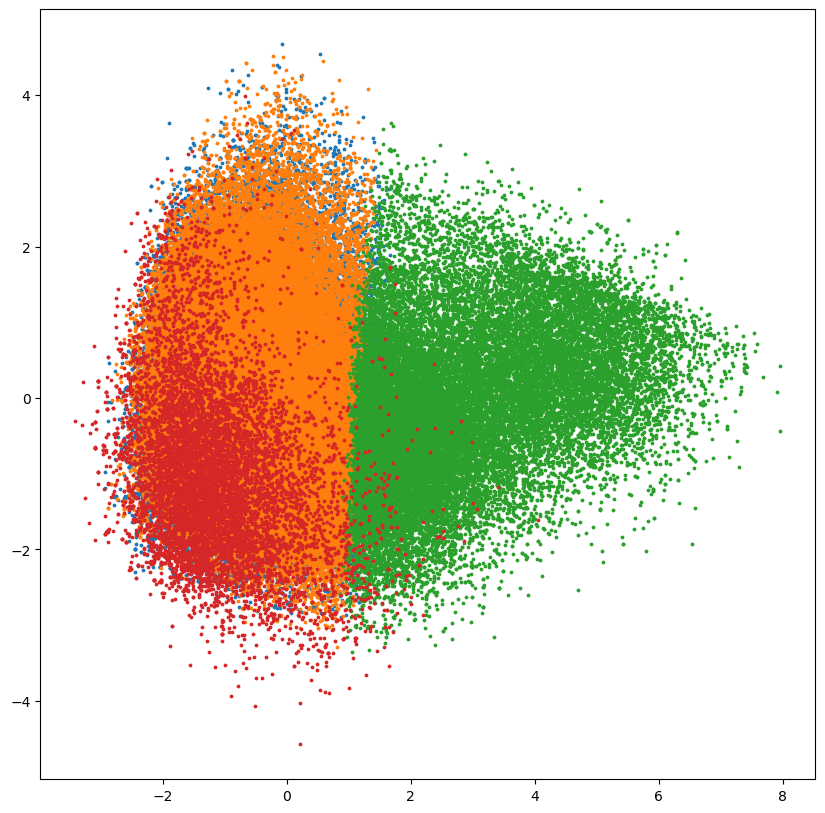

In [40]:
plt.figure(figsize=(10,10))
for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=12)

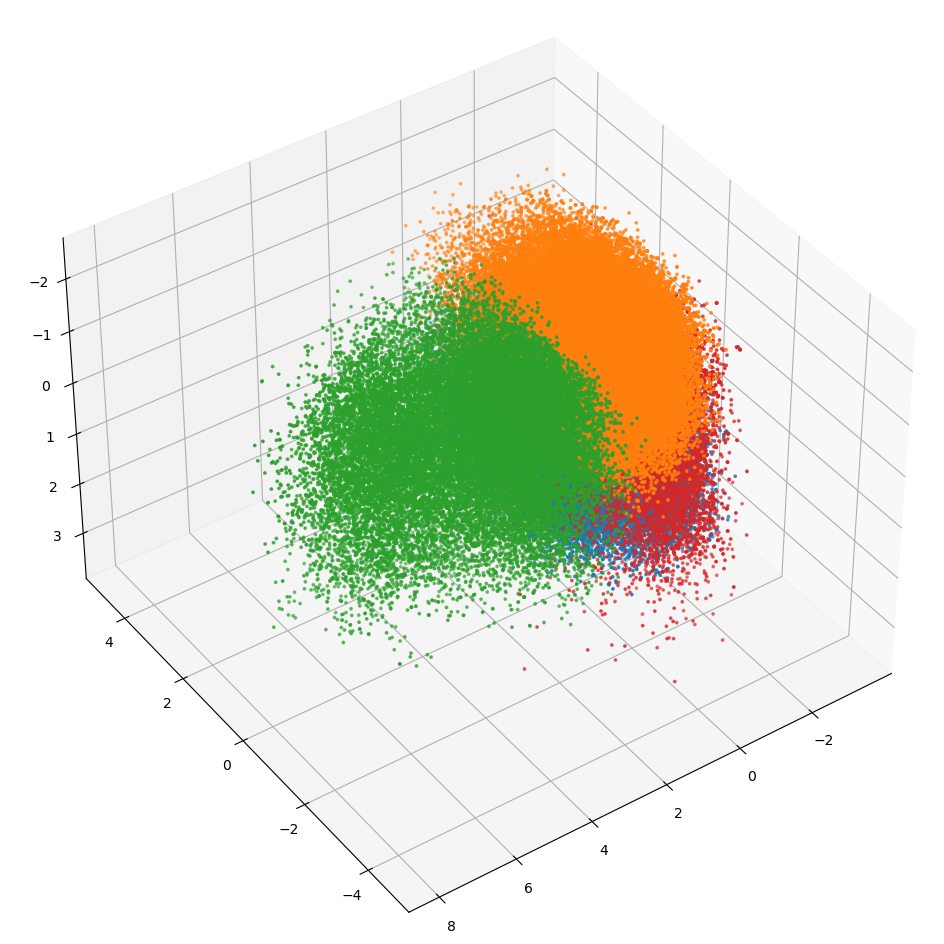

In [41]:
#m3d.figure(figsize=(10,10))
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')

for c in np.unique(cluster_ids):
    sct = ax.scatter3D(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], X_pca[cluster_ids == c, 2], marker='.', s=12)

ax.view_init(-140, 125)

In [68]:
cluster_ids1 = KMeans(n_clusters=20, n_init=10).fit_predict(X_normalized)

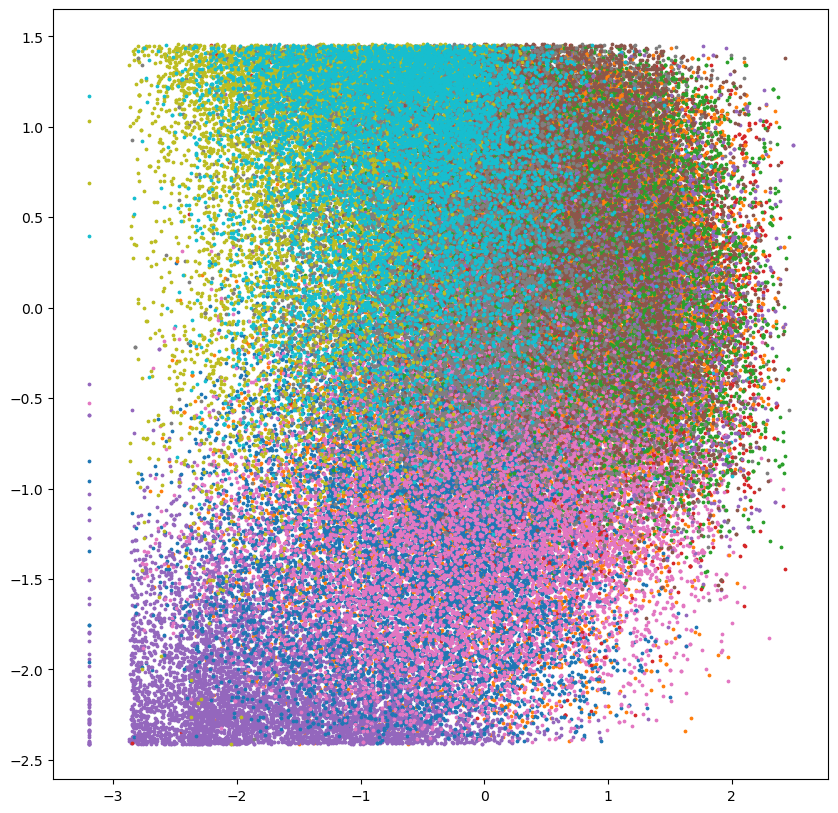

In [43]:
plt.figure(figsize=(10,10))
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=12)

## spotify_Exploit_2

In [44]:
df = pd.read_csv('audio_features.csv', sep=',')
print(len(df))
df = df.drop_duplicates()
print(len(df))
df.dropna(subset=["item","genre","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"], inplace=True)

154835
154835


In [ ]:
#df.head(10)

In [45]:
df1=df[["id","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]]

In [46]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df1[["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]])

In [47]:
df_normalized = pd.DataFrame(X_normalized, columns=["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"])

In [48]:
pca = PCA(n_components=10)

In [49]:
pca.fit(X_normalized)

PCA(n_components=10)

In [50]:
X_pca = pca.transform(X_normalized)

In [51]:
kmeans = KMeans(n_clusters=20, n_init=10)

In [52]:
kmeans.fit(X_pca)

KMeans(n_clusters=20)

In [54]:
df["cluster"] = kmeans.predict(X_pca)

In [55]:
df["cluster"]

0          3
1         12
2          0
3         18
4          0
          ..
154830    17
154831    19
154832     5
154833     6
154834    17
Name: cluster, Length: 154835, dtype: int32

In [56]:
df.to_csv('audio_features_clustered.csv',',',index=True)

In [ ]:
#Import spotipy Libraries & credentials
#from spotipy.oauth2 import SpotifyClientCredentials
#from dotenv import load_dotenv
#import os

#load_dotenv('.env')
#c_id = os.environ['USER_ID']
#c_se = os.environ['USER_Q']

#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))

In [65]:
SongName = input('Enter song name')
if len(SongName)==0:
    SongName='Bohemian Rhapsody'

try:
    results = sp.search(q='track:"{}"'.format(SongName), type='track', limit=1)
    
    #print(results['tracks']['items'][0]['id'])

except spotipy.SpotifyException as e:
        print(e.msg)

song_audio_features = sp.audio_features(results['tracks']['items'][0]['id'])
MonDic = { 'danceability' : song_audio_features[0]['danceability'],'energy' : song_audio_features[0]['energy'],'key' : song_audio_features[0]['key'],'mode' : song_audio_features[0]['mode'],'loudness' : song_audio_features[0]['loudness'],'speechiness' : song_audio_features[0]['speechiness'],'acousticness' : song_audio_features[0]['acousticness'],'instrumentalness' : song_audio_features[0]['instrumentalness'],'valence' : song_audio_features[0]['valence'],'tempo' : song_audio_features[0]['tempo']}
#print(MonDic)
song_scaled = scaler.transform(pd.DataFrame([MonDic]))
Bin = kmeans.predict(song_scaled)
print('Cluster:',Bin)
df2=df.loc[df['cluster'] == Bin[0]].sample(n=10)

print('Playlist for',SongName)
display(df2[['id','genre','name','artist']])

df.loc[df['cluster'] == Bin[0]].value_counts('genre').head(10)

Enter song nameThe Heart Part 5
Cluster: [1]
Playlist for The Heart Part 5


,id,genre,name,artist
12526,70eDxAyAraNTiD6lx2ZEnH,Blues,Ex's & Oh's,Elle King
132067,5clFSlfkCRlhnH1cAQjSBi,Reggaeton,Sensacion Del Bloque,De La Ghetto
79307,4LYp1cXHiCMR0wJHcWpTCj,Indie Pop Rock,Mulholland Drive,Heavy Young Heathens
69856,7i8jTYNVNqKq88tAozsopK,Hard House,Real Freaks - Hoodlums All Freaked Out Remix -...,Anne Savage
53342,2PlyHAHOb0kJrbfI1MFCYC,Folklore Argentino,Como Te Extraño,Abel Pintos
70561,4kAXkXwsLqmTjM59M5y91s,Hard Stoner Rock,Coition,SuperGiant
39414,0oWraSo5ASJ0h1BEagTyEw,Dance Pop,Hold My Hand,Lady Gaga
76899,13Yp8NZZ4kpj579OBoTOqO,Indie Emo,Dance Like Everyone Is Watching,Twelve Hour Turn
44743,2egKQvoHiCJyHXn8lRlsrl,Electro House,Be Right There,Diplo
37089,7yNTZj1ugKCeRJdSP1meOk,Country Dawn,Ready to Run,The Chicks


genre
Brazilian Gospel         131
Garage Punk              130
Alternative Metalcore    128
Alternative Hardcore     124
Dubstep                  109
Grunge Pop               107
Alternative Country      106
Latin Metal              100
Garage Pop               100
Metal                     99
dtype: int64

In [60]:
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"
track_id= '72tT6zQPbonHSHcXYZVIsw'
IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [66]:
df2=df.loc[df['cluster'] == 1].sample(n=10)
display(df2[['genre','name','artist']])

,genre,name,artist
39001,Dance Pop,Just the Way You Are,Bruno Mars
23187,Classic Czech Pop,Par nepratel,Petr Kolář
116770,Pop Emo,Way Down,The Dangerous Summer
57864,French Pop,"Amour, Haine & Danger",Angèle
134263,Rock Gaucho,Pense Bem,Vera Loca
43866,Electro,Make It Bun Dem,Skrillex
80009,Indie R&b,Patient,Isaia Huron
10928,Alternative Rock,Hate To Say I Told You So,The Hives
6858,Alternative Emo,Escape Rope,Origami Angel
6603,Alternative Emo,Heart Tattoo,Joyce Manor


In [67]:
MonDic = { 'danceability' : song_audio_features[0]['danceability'],'energy' : song_audio_features[0]['energy'],'key' : song_audio_features[0]['key'],'loudness' : song_audio_features[0]['loudness'],'mode' : song_audio_features[0]['mode'],'speechiness' : song_audio_features[0]['speechiness'],'acousticness' : song_audio_features[0]['acousticness'],'instrumentalness' : song_audio_features[0]['instrumentalness'],'valence' : song_audio_features[0]['valence'],'tempo' : song_audio_features[0]['tempo']}
print(MonDic)

{'danceability': 0.7, 'energy': 0.812, 'key': 1, 'loudness': -8.128, 'mode': 0, 'speechiness': 0.297, 'acousticness': 0.183, 'instrumentalness': 0, 'valence': 0.801, 'tempo': 97.405}


In [63]:
sp.track('1yjY7rpaAQvKwpdUliHx0d')

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74XFHRwlV6OrjEM0A2NCMF'},
    'href': 'https://api.spotify.com/v1/artists/74XFHRwlV6OrjEM0A2NCMF',
    'id': '74XFHRwlV6OrjEM0A2NCMF',
    'name': 'Paramore',
    'type': 'artist',
    'uri': 'spotify:artist:74XFHRwlV6OrjEM0A2NCMF'}],
  'available_markets': ['AE',
   'AG',
   'AL',
   'AM',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BN',
   'BO',
   'BR',
   'BS',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GR',
   'GT',
   'GW',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IQ',
   'IS',
   'IT',
   'JM',
   'JO',
   'JP',
   'KE',
   'KG',
   'KH',
   

In [64]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3A%22Vitamin%22&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/56dO9zeHKuU5Gvfc2kxHNw'},
       'href': 'https://api.spotify.com/v1/artists/56dO9zeHKuU5Gvfc2kxHNw',
       'id': '56dO9zeHKuU5Gvfc2kxHNw',
       'name': 'Chevelle',
       'type': 'artist',
       'uri': 'spotify:artist:56dO9zeHKuU5Gvfc2kxHNw'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE'